In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Deep Learning/Stock Predictions/BHARTIARTL.NS.csv',
                 parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,347.000000,349.850006,345.149994,348.500000,344.158386,3405198.0
2019-07-02,349.000000,354.500000,347.350006,353.600006,349.194855,3745884.0
2019-07-03,352.899994,356.500000,349.750000,353.200012,348.799835,8317090.0
2019-07-04,353.350006,365.000000,353.000000,362.750000,358.230865,8407402.0
2019-07-05,362.750000,371.149994,360.500000,364.799988,360.255310,6751716.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2019-07-01 to 2023-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1079 non-null   float64
 1   High       1079 non-null   float64
 2   Low        1079 non-null   float64
 3   Close      1079 non-null   float64
 4   Adj Close  1079 non-null   float64
 5   Volume     1079 non-null   float64
dtypes: float64(6)
memory usage: 59.1 KB


<Axes: xlabel='Date'>

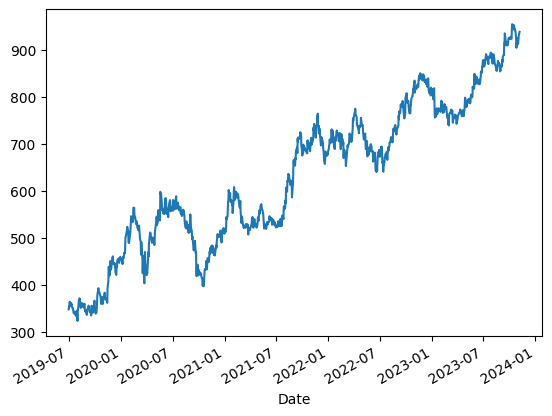

In [4]:
df['Close'].plot()

In [5]:
len(df)

1080

<Axes: xlabel='Date'>

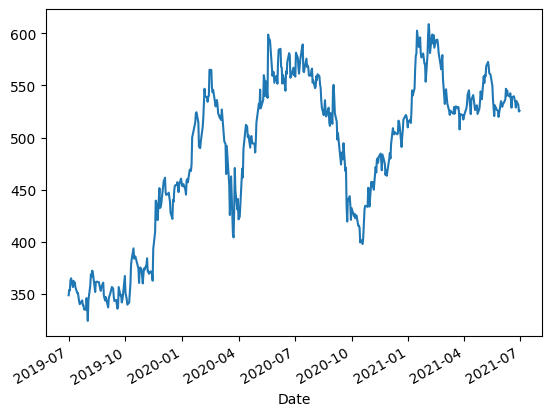

In [6]:
df['Close'].head(496).plot()

In [7]:
df = df.head(496) # to cope with video, I only taken the required values, will add remaining later
len(df)

496

In [8]:
airtel_close = df['Close']
airtel_close.head() ## We need to drop the date here

Date
2019-07-01    348.500000
2019-07-02    353.600006
2019-07-03    353.200012
2019-07-04    362.750000
2019-07-05    364.799988
Name: Close, dtype: float64

In [9]:
airtel_close.reset_index(drop=True, inplace=True)
airtel_close.shape

(496,)

In [10]:
airtel_close.head()

0    348.500000
1    353.600006
2    353.200012
3    362.750000
4    364.799988
Name: Close, dtype: float64

In [11]:
airtel_close = pd.DataFrame(airtel_close)

In [12]:
# Train test split
train = airtel_close.iloc[:480]
test = airtel_close.iloc[480:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(train) # By doing this we will get the Max and Min value of the training dataset

MinMaxScaler()

In [15]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Creating the model

In [17]:
# If we dont know what the function does, we can follow the below
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [18]:
length = 16
batch_size = 32
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size) #In time series our data is x and y

# It will create an object with train - length. and last 16 values will be predicted and validated

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [20]:
n_features = 1

In [21]:
model = Sequential()

model.add(SimpleRNN(30, input_shape=(length, n_features)))

model.add(Dropout(rate=0.2))
# fully connected layer occupies most of the parameters, and hence neurons develop co-dependency amongst each other
# during training which curbs the individual power of each neuron leading to over-fitting of training data
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
from sklearn.utils import shuffle
model.fit_generator(generator, epochs=10, shuffle=False)

<ipython-input-23-d69f50650986>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


Epoch 1/10
15/15 [==============================] - 8s 22ms/step - loss: 0.3190
Epoch 2/10
15/15 [==============================] - 0s 21ms/step - loss: 0.0585
Epoch 3/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0345
Epoch 4/10
15/15 [==============================] - 0s 28ms/step - loss: 0.0288
Epoch 5/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0234
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0206
Epoch 8/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 9/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0177
Epoch 10/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0148


In [24]:
losses = pd.DataFrame(model.history.history)

<Axes: >

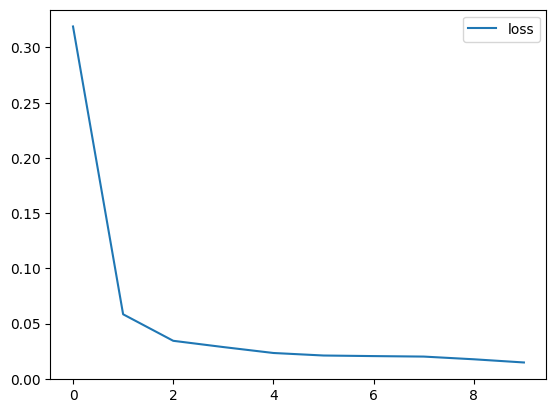

In [25]:
losses.plot()

# Evaluate the test set

In [26]:
first_eval_batch = scaled_train[-length:] #picks last 16 values

In [27]:
first_eval_batch

array([[0.74556938],
       [0.716968  ],
       [0.69047216],
       [0.72661881],
       [0.71205477],
       [0.70959816],
       [0.70836996],
       [0.68748906],
       [0.70082469],
       [0.74048094],
       [0.73346216],
       [0.72153016],
       [0.73047906],
       [0.73276024],
       [0.74592045],
       [0.78224253]])

In [28]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [29]:
first_eval_batch

array([[[0.74556938],
        [0.716968  ],
        [0.69047216],
        [0.72661881],
        [0.71205477],
        [0.70959816],
        [0.70836996],
        [0.68748906],
        [0.70082469],
        [0.74048094],
        [0.73346216],
        [0.72153016],
        [0.73047906],
        [0.73276024],
        [0.74592045],
        [0.78224253]]])

In [30]:
model.predict(first_eval_batch) #first prediction after train set which is 1st value of test

1/1 [==============================] - 0s 144ms/step


array([[0.74387175]], dtype=float32)

In [31]:
scaled_test[0]

array([0.74504847])

In [32]:
test_predictions = []

first_eval_batch = scaled_test[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
  # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
  current_pred = model.predict(current_batch)[0]

  # Store predictions
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 17ms/step


In [33]:
test_predictions

[array([-0.14162019], dtype=float32),
 array([0.46945935], dtype=float32),
 array([0.11106844], dtype=float32),
 array([0.30908963], dtype=float32),
 array([0.43105143], dtype=float32),
 array([-0.00241398], dtype=float32),
 array([0.29862168], dtype=float32),
 array([0.02128637], dtype=float32),
 array([0.3980145], dtype=float32),
 array([0.6196463], dtype=float32),
 array([0.10292042], dtype=float32),
 array([0.63870704], dtype=float32),
 array([0.09577078], dtype=float32),
 array([0.4131463], dtype=float32),
 array([0.4692875], dtype=float32),
 array([-0.17047468], dtype=float32)]

In [34]:
true_predictions = scaler.inverse_transform(test_predictions) ##applying the inverse transform to bring original values
true_predictions

array([[522.08928248],
       [534.4330966 ],
       [527.19359587],
       [531.19362625],
       [533.65725612],
       [524.9012496 ],
       [530.98217361],
       [525.37999693],
       [532.98990939],
       [537.46687491],
       [527.02900573],
       [537.85190191],
       [526.88458283],
       [533.29557196],
       [534.42962543],
       [521.50642145]])

In [35]:
test['predictions'] = true_predictions

<ipython-input-35-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [36]:
test

,Close,predictions
480,540.000000,522.089282
481,545.150024,534.433097
482,540.849976,527.193596
483,539.349976,531.193626
484,542.500000,533.657256
485,536.750000,524.901250
486,528.650024,530.982174
487,538.750000,525.379997
488,539.599976,532.989909
489,536.400024,537.466875


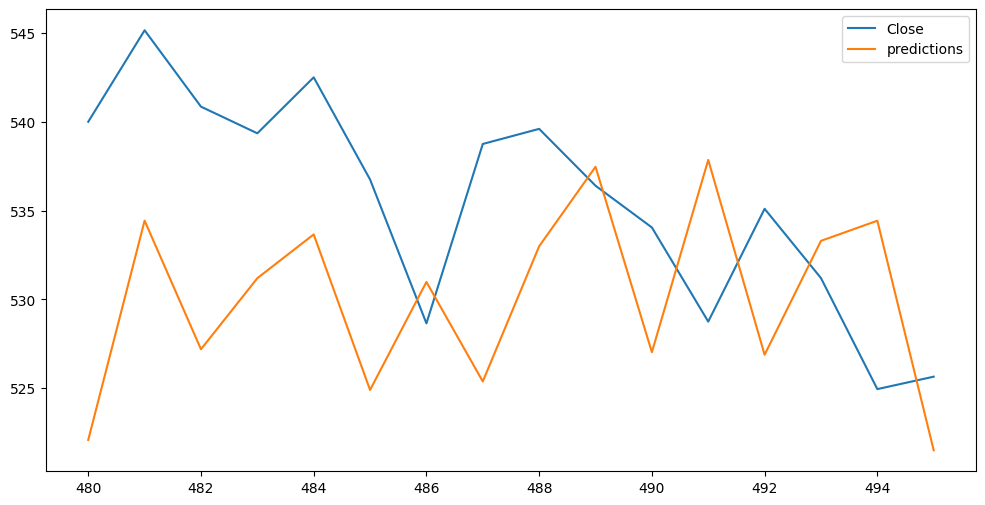

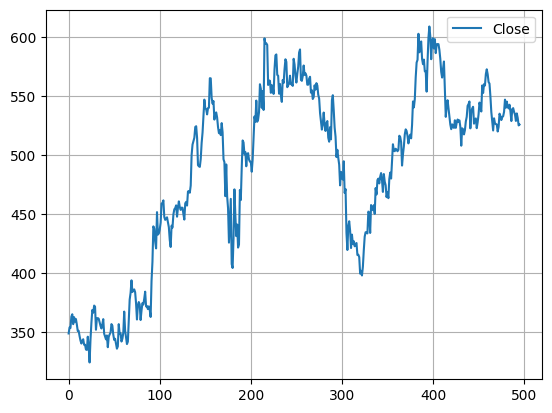

In [52]:
test.plot(figsize=(12, 6))
airtel_close.plot()
plt.grid()

## Let's create full model

In [38]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(airtel_close)

In [39]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length = length, batch_size=32)

In [40]:
model = Sequential()

model.add(SimpleRNN(30, input_shape=(length, n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [41]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-41-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


15/15 [==============================] - 1s 18ms/step - loss: 0.1451
Epoch 2/10
15/15 [==============================] - 0s 19ms/step - loss: 0.0854
Epoch 3/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0403
Epoch 4/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0316
Epoch 5/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0303
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0264
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0239
Epoch 8/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0237
Epoch 9/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0235
Epoch 10/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0198


<Axes: >

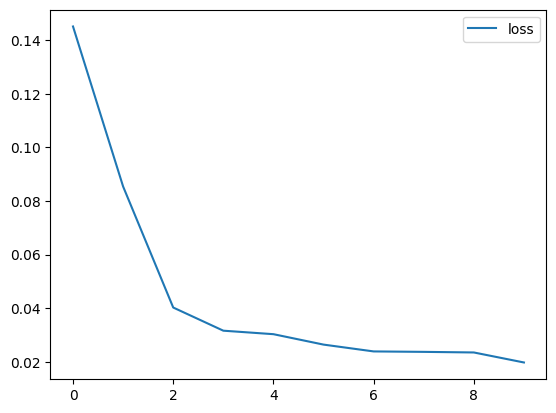

In [42]:
full_model_losses = pd.DataFrame(model.history.history)
full_model_losses.plot()

In [43]:
forecast = []

first_eval_batch = scaled_test[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(20):
  # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
  current_pred = model.predict(current_batch)[0]

  # Store predictions
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


1/1 [==============================] - 0s 22ms/step


In [44]:
forecast = scaler.inverse_transform(forecast)

In [45]:
forecast

array([[532.42541018],
       [532.42173312],
       [533.49743403],
       [533.58832809],
       [531.98920836],
       [533.17418382],
       [529.37783537],
       [525.47887539],
       [528.84712502],
       [530.57838686],
       [531.64563558],
       [535.08464546],
       [538.45208148],
       [536.16178576],
       [534.7792273 ],
       [530.51875624],
       [528.2795005 ],
       [529.3274278 ],
       [529.6366696 ],
       [531.32148838]])

In [46]:
forecast.flatten()

array([532.42541018, 532.42173312, 533.49743403, 533.58832809,
       531.98920836, 533.17418382, 529.37783537, 525.47887539,
       528.84712502, 530.57838686, 531.64563558, 535.08464546,
       538.45208148, 536.16178576, 534.7792273 , 530.51875624,
       528.2795005 , 529.3274278 , 529.6366696 , 531.32148838])

In [47]:
df_array = np.array(airtel_close)
df_array

array([[348.5     ],
       [353.600006],
       [353.200012],
       [362.75    ],
       [364.799988],
       [356.399994],
       [362.299988],
       [358.549988],
       [360.75    ],
       [356.100006],
       [350.600006],
       [350.75    ],
       [346.25    ],
       [342.5     ],
       [339.950012],
       [342.549988],
       [343.600006],
       [338.899994],
       [339.      ],
       [334.899994],
       [334.549988],
       [345.75    ],
       [337.600006],
       [323.899994],
       [343.549988],
       [357.700012],
       [368.450012],
       [366.100006],
       [372.149994],
       [371.149994],
       [351.649994],
       [361.200012],
       [361.549988],
       [361.      ],
       [358.049988],
       [354.899994],
       [352.75    ],
       [356.399994],
       [360.649994],
       [348.299988],
       [345.799988],
       [343.5     ],
       [346.799988],
       [336.850006],
       [345.700012],
       [347.700012],
       [349.25    ],
       [356.4

In [48]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

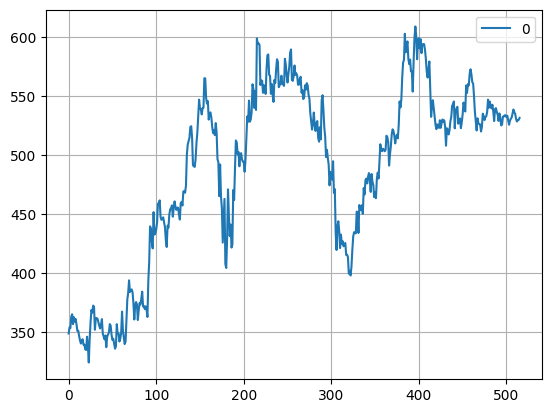

In [50]:
full_data.plot()
plt.grid()

## LSTM model

In [54]:
from tensorflow.keras.callbacks import EarlyStopping # by giving this the model will automatically predict where to stop, we need not to give epochs
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [55]:
length

16

In [56]:
scaled_test.shape

(16, 1)

In [57]:
length = 15

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=32)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length=length, batch_size=32)

In [59]:
model = Sequential()

model.add(LSTM(30, input_shape = (length, n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [60]:
model.fit_generator(generator, epochs=20,
                    validation_data = validation_generator,
                    callbacks = [early_stop], shuffle=False)

Epoch 1/20


<ipython-input-60-3546d98a9458>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,


15/15 [==============================] - 4s 52ms/step - loss: 0.1077 - val_loss: 0.2105
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0214 - val_loss: 0.3052
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0219 - val_loss: 0.2280


<Axes: >

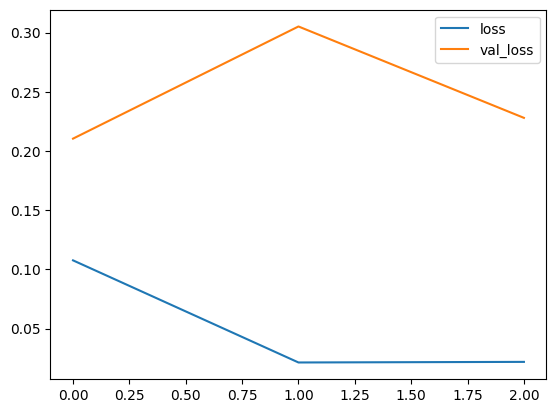

In [61]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_test[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
  # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
  current_pred = model.predict(current_batch)[0]

  # Store predictions
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

<ipython-input-62-348a1089301f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions'] = true_predictions


<Axes: >

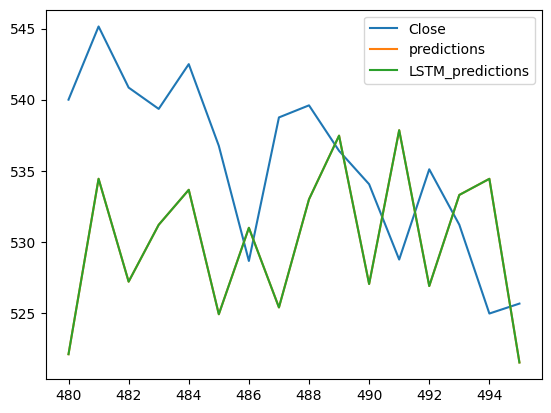

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions'] = true_predictions
test.plot()

In [63]:
forecast = []

first_eval_batch = scaled_test[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(20):
  # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
  current_pred = model.predict(current_batch)[0]

  # Store predictions
  forecast.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


1/1 [==============================] - 0s 20ms/step


In [64]:
forecast = scaler.inverse_transform(forecast)

<Axes: >

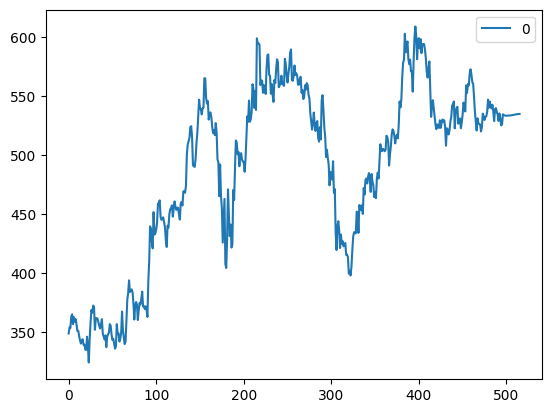

In [66]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))
full_data.plot()